In [2]:
import numpy as np
import os
import torch

DATA_PATH = '/rdf/user/pg34/sleep_data/'

In [3]:
train_data = np.load(os.path.join(DATA_PATH, 'Training_new', 'p00_n1_NEW_X.npy'))
train_label = np.load(os.path.join(DATA_PATH, 'Training_new', 'p00_n1_NEW_y.npy'))

[1. 2. 3. 4. 5. 6.]
(array([1997,   58,  250,  101,  119,  125]), array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16666667, 6.        ]))


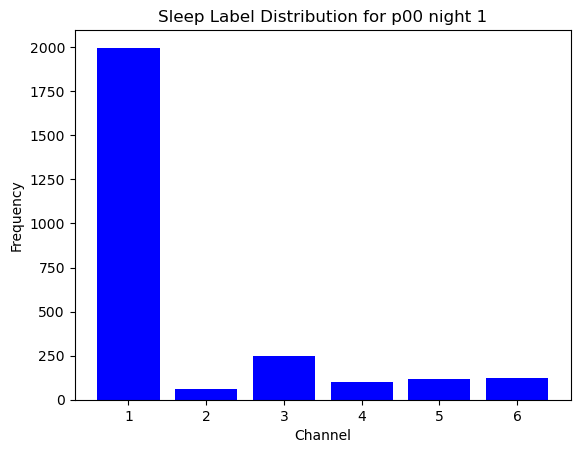

In [69]:
# histogram of labels
print(np.unique(train_label))
print(np.histogram(train_label, bins=6))
# plot of labels
import matplotlib.pyplot as plt


p00_y = np.histogram(train_label, bins=6)[0]
# p00_y = [0,0,0,0,0,0]
# idx = 0
# for i in np.histogram(train_label, bins=6)[0]:
#     p00_y[idx+1] = i;

# Generate x-axis values (indices)
indices = list(range(1, len(p00_y)))

# Plot histogram
plt.bar(indices, p00_y, color='blue')
plt.title('Sleep Label Distribution for p00 night 1')
plt.xlabel('Channel')
plt.ylabel('Frequency')

# Show the plot
plt.show()

(array([1904,   84,  392,   59,  163,  168]), array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16666667, 6.        ]))
(array([2008,   61,  485,   56,    1,  209]), array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16666667, 6.        ]))
(array([1839,   13,  503,   80,   49,  158]), array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16666667, 6.        ]))
(array([1958,   89,  403,   80,   82,  198]), array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16666667, 6.        ]))
(array([1780,  114,  617,  107,    8,  180]), array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16666667, 6.        ]))
(array([2258,   44,  217,  116,   19,   68]), array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16666667, 6.        ]))
(array([1909,  117,  608,   25,    0,  199]), array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16

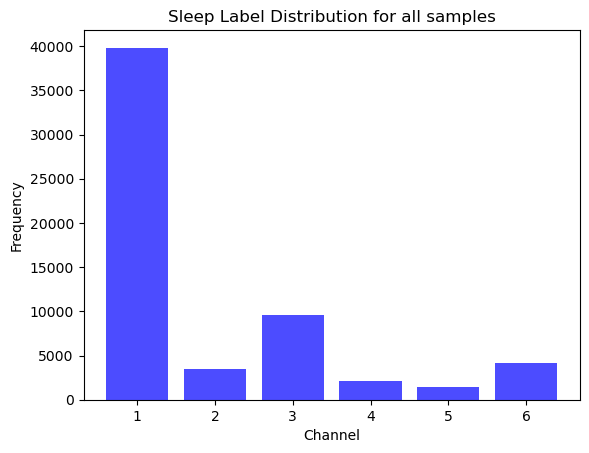

In [68]:
import glob

# Step 1: Loading the label files
file_paths = glob.glob('/rdf/user/pg34/sleep_data/Training_new/*_y.npy')  # Replace with your directory path
data = [np.load(fp) for fp in file_paths]

bins_count = [0,0,0,0,0,0]

for i in range(len(data)):
    hist = np.histogram(data[i], bins=6)
    print(hist)
    for j in range(0,6):
        bins_count[j] += hist[0][j]
    
print("Total: " + str(bins_count));

# Generate x-axis values (indices)
indices = list(range(1, len(bins_count)+1))

# Plot histogram
plt.bar(indices, bins_count, color='blue', alpha=0.7)
plt.title('Sleep Label Distribution for all samples')
plt.xlabel('Channel')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# fig, axes = plt.subplots(nrows=len(data), ncols=1, figsize=(7, 20))  # Adjust figsize as needed

# for i in range(len(data)):
#     axes[i].hist(data[i], bins=6)
#     axes[i].set_title('Sleep Stages for participant ' + str(i))

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()


No handles with labels found to put in legend.


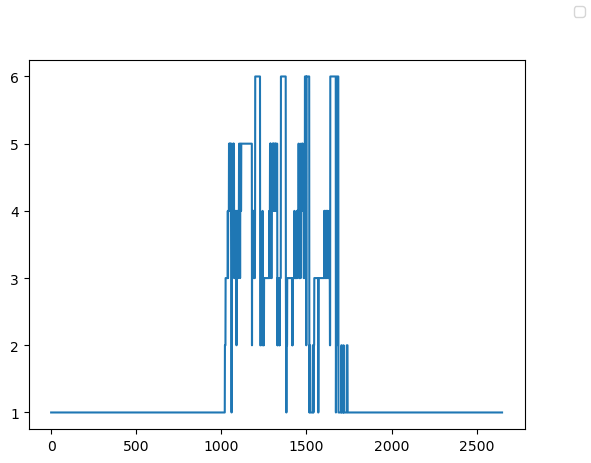

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import sosfiltfilt, filtfilt, butter, find_peaks, savgol_filter, peak_widths, coherence
from scipy.fft import rfft, rfftfreq
from sklearn.preprocessing import StandardScaler

channels = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal']

X = np.load(os.path.join(DATA_PATH, 'Training_new', 'p00_n1_NEW_X.npy'))

        
y = np.load(os.path.join(DATA_PATH, 'Training_new', 'p00_n1_NEW_y.npy'))

# plot the whole night
# X_prime = np.reshape(X, (X.shape[1], -1))

fig, ax2 = plt.subplots()
# color = 'tab:red'

# for ch, label in enumerate(channels[5:6]):
#     ax1.plot(np.arange(0, y.shape[0],  1 / 30), X_prime[ch], label=label, color=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(y, color=color)
fig.legend()
plt.show()

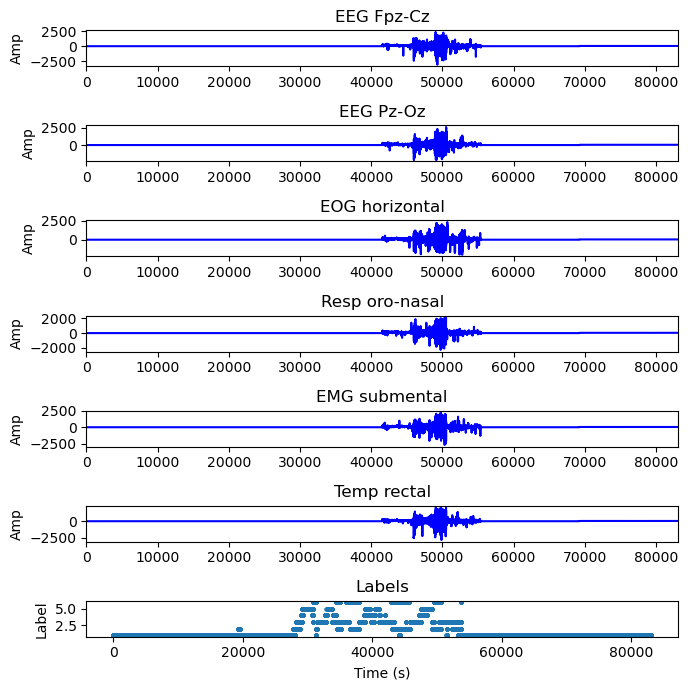

In [29]:
# Old Training Data Visualization
data = np.load(os.path.join(DATA_PATH, 'Training', 'p07_n2_X.npy'))
label = np.load(os.path.join(DATA_PATH, 'Training', 'p07_n2_y.npy'))

downsampling_factor = 10  
N, channels, data_length = data.shape
# Downsample the data
x = data[:, :, ::downsampling_factor]
x = np.hstack(x)

# Time vector for plotting (assuming 100Hz sampling rate and downsampling)
continuous_time_vector = np.linspace(0, N * data_length / 100, x.shape[1])
channel_names = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal']

# Re-plotting with the corrected data structure
fig, axs = plt.subplots(channels+1, 1, figsize=(7, 7))

for i in range(channels):
    axs[i].plot(continuous_time_vector, x[i, :], color='blue')
    axs[i].set_title(channel_names[i])
    axs[i].set_ylabel('Amp')
    axs[i].set_xlim([continuous_time_vector[0], continuous_time_vector[-1]])

# Plotting labels in the last subplot
# Repeating the labels for each data point (assuming each label applies to the entire epoch)
repeated_labels = np.repeat(label, data_length)[::downsampling_factor]

axs[-1].plot(continuous_time_vector, repeated_labels, 'o', markersize=2)
axs[-1].set_title('Labels')
axs[-1].set_ylabel('Label')
axs[-1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

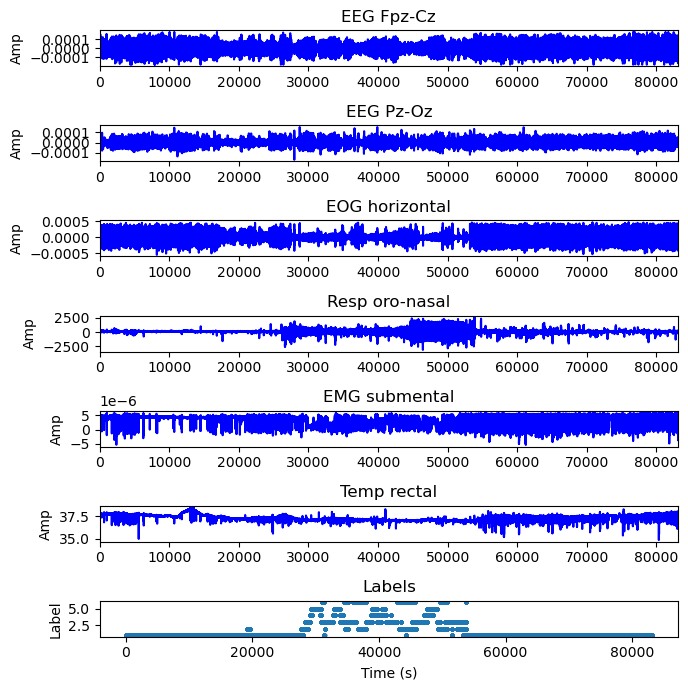

In [32]:
# New Training Data Visualization
data_new = np.load(os.path.join(DATA_PATH, 'Training_new', 'p07_n2_NEW_X.npy'))
label_new = np.load(os.path.join(DATA_PATH, 'Training_new', 'p07_n2_NEW_y.npy'))

downsampling_factor = 10  
N, channels, data_length = data.shape
# Downsample the data
x = data_new[:, :, ::downsampling_factor]
x = np.hstack(x)

# Time vector for plotting (assuming 100Hz sampling rate and downsampling)
continuous_time_vector = np.linspace(0, N * data_length / 100, x.shape[1])
channel_names = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal']

# Re-plotting with the corrected data structure
fig, axs = plt.subplots(channels+1, 1, figsize=(7, 7))

for i in range(channels):
    axs[i].plot(continuous_time_vector, x[i, :], color='blue')
    axs[i].set_title(channel_names[i])
    axs[i].set_ylabel('Amp')
    axs[i].set_xlim([continuous_time_vector[0], continuous_time_vector[-1]])

# Plotting labels in the last subplot
# Repeating the labels for each data point (assuming each label applies to the entire epoch)
repeated_labels = np.repeat(label_new, data_length)[::downsampling_factor]

axs[-1].plot(continuous_time_vector, repeated_labels, 'o', markersize=2)
axs[-1].set_title('Labels')
axs[-1].set_ylabel('Label')
axs[-1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

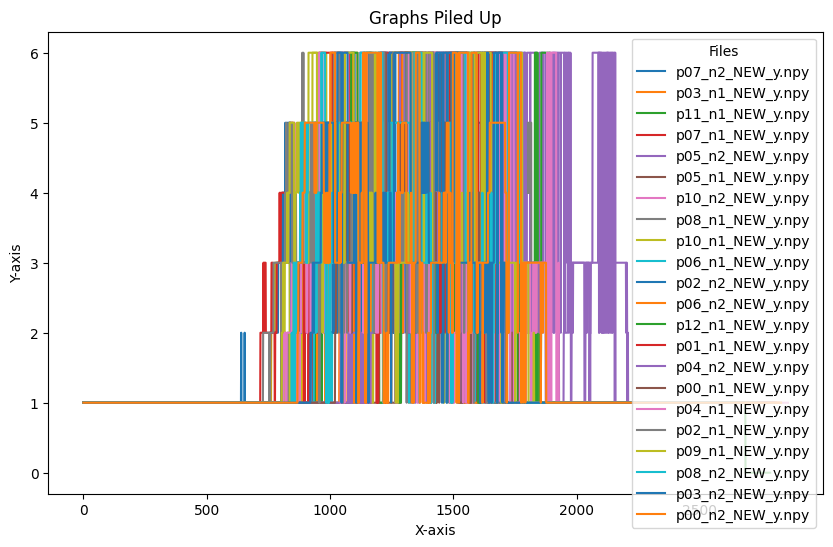

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

directory_path = DATA_PATH + 'Training_new'

# Use glob to find files with a similar format
matching_files = [f for f in os.listdir(directory_path) if f.endswith('.npy') and f.startswith('p') and 'NEW_y' in f]

# Plotting setup
plt.figure(figsize=(10, 6))
plt.title('Graphs Piled Up')

# Loop through each file and draw a graph
for file_name in matching_files:
    file_path = os.path.join(directory_path, file_name)
    data = np.load(file_path)

    # Assuming data is a 1D array, adjust plotting based on your data structure
    x_values = np.arange(len(data))
    plt.plot(x_values, data, label=file_name)

# Customize the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(title='Files')
plt.show()

In [6]:
print(f"x shape: {train_data.shape}")
print(f"y shape: {train_label.shape}")

x shape: (2650, 6, 3000)
y shape: (2650,)


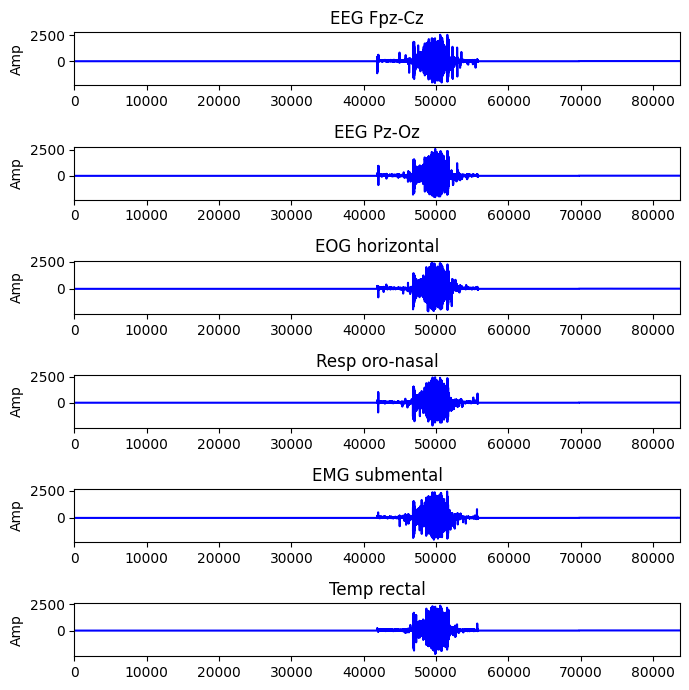

In [7]:
eval_a = np.load(os.path.join(DATA_PATH, 'Evaluation', 'eval_a_X.npy'))

downsampling_factor = 10  
N, channels, data_length = eval_a.shape
# Downsample the data
x = eval_a[:, :, ::downsampling_factor]
x = np.hstack(x)

# Time vector for plotting (assuming 100Hz sampling rate and downsampling)
continuous_time_vector = np.linspace(0, N * data_length / 100, x.shape[1])
channel_names = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal']

# Re-plotting with the corrected data structure
fig, axs = plt.subplots(channels , 1, figsize=(7, 7))

for i in range(channels):
    axs[i].plot(continuous_time_vector, x[i, :], color='blue')
    axs[i].set_title(channel_names[i])
    axs[i].set_ylabel('Amp')
    axs[i].set_xlim([continuous_time_vector[0], continuous_time_vector[-1]])

# Plotting labels in the last subplot
# Repeating the labels for each data point (assuming each label applies to the entire epoch)
# repeated_labels = np.repeat(train_label, data_length)[::downsampling_factor]

# axs[-1].plot(continuous_time_vector, repeated_labels, 'o', markersize=2)
# axs[-1].set_title('Labels')
# axs[-1].set_ylabel('Label')
# axs[-1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

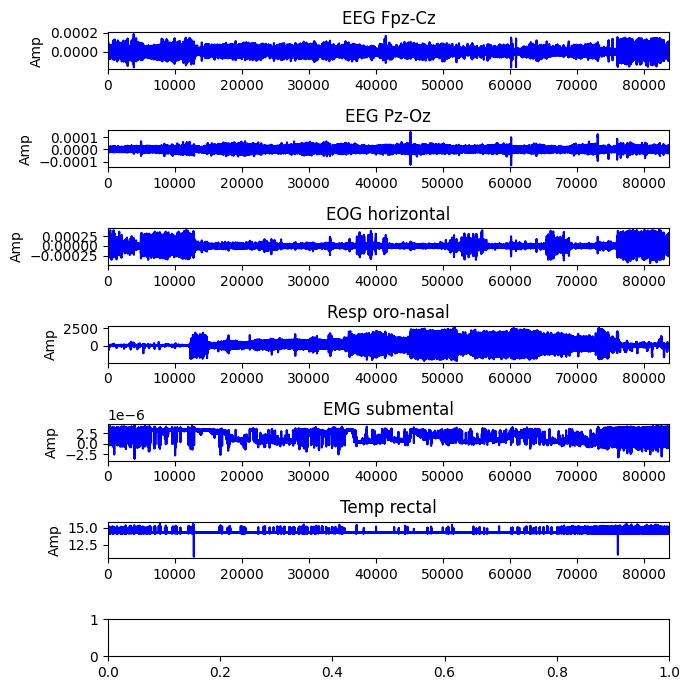

In [8]:
eval_a_new = np.load(os.path.join(DATA_PATH, 'Eval_new', 'eval_a_NEW_X.npy'))

downsampling_factor = 10  
N, channels, data_length = eval_a.shape
# Downsample the data
x = eval_a_new[:, :, ::downsampling_factor]
x = np.hstack(x)

# Time vector for plotting (assuming 100Hz sampling rate and downsampling)
continuous_time_vector = np.linspace(0, N * data_length / 100, x.shape[1])
channel_names = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal']

# Re-plotting with the corrected data structure
fig, axs = plt.subplots(channels + 1, 1, figsize=(7, 7))

for i in range(channels):
    axs[i].plot(continuous_time_vector, x[i, :], color='blue')
    axs[i].set_title(channel_names[i])
    axs[i].set_ylabel('Amp')
    axs[i].set_xlim([continuous_time_vector[0], continuous_time_vector[-1]])

# Plotting labels in the last subplot
# Repeating the labels for each data point (assuming each label applies to the entire epoch)
# repeated_labels = np.repeat(train_label, data_length)[::downsampling_factor]

# axs[-1].plot(continuous_time_vector, repeated_labels, 'o', markersize=2)
# axs[-1].set_title('Labels')
# axs[-1].set_ylabel('Label')
# axs[-1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

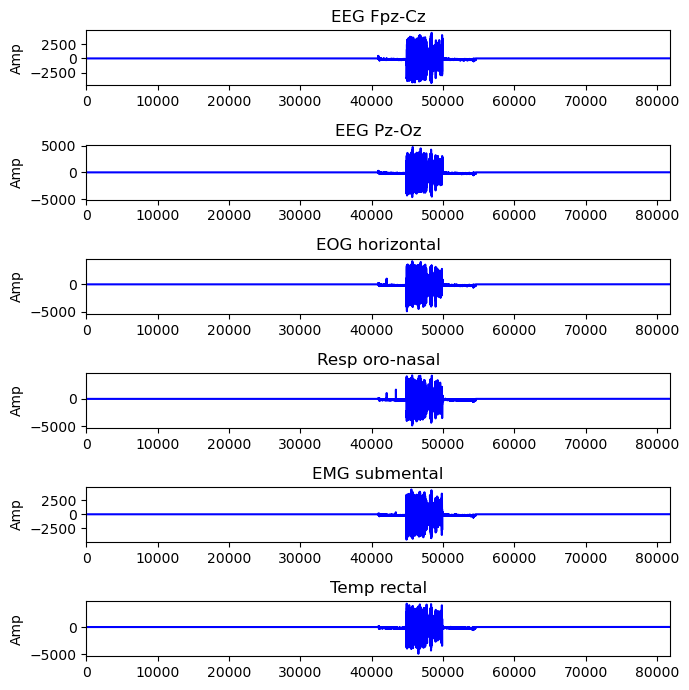

In [31]:
eval_b = np.load(os.path.join(DATA_PATH, 'Evaluation', 'eval_b_X.npy'))

downsampling_factor = 10  
N, channels, data_length = eval_b.shape
# Downsample the data
x = eval_b[:, :, ::downsampling_factor]
x = np.hstack(eval_b)

# Time vector for plotting (assuming 100Hz sampling rate and downsampling)
continuous_time_vector = np.linspace(0, N * data_length / 100, x.shape[1])
channel_names = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal']

# Re-plotting with the corrected data structure
fig, axs = plt.subplots(channels, 1, figsize=(7, 7))

for i in range(channels):
    axs[i].plot(continuous_time_vector, x[i, :], color='blue')
    axs[i].set_title(channel_names[i])
    axs[i].set_ylabel('Amp')
    axs[i].set_xlim([continuous_time_vector[0], continuous_time_vector[-1]])

# Plotting labels in the last subplot
# Repeating the labels for each data point (assuming each label applies to the entire epoch)
# repeated_labels = np.repeat(train_label, data_length)[::downsampling_factor]

# axs[-1].plot(continuous_time_vector, repeated_labels, 'o', markersize=2)
# axs[-1].set_title('Labels')
# axs[-1].set_ylabel('Label')
# axs[-1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

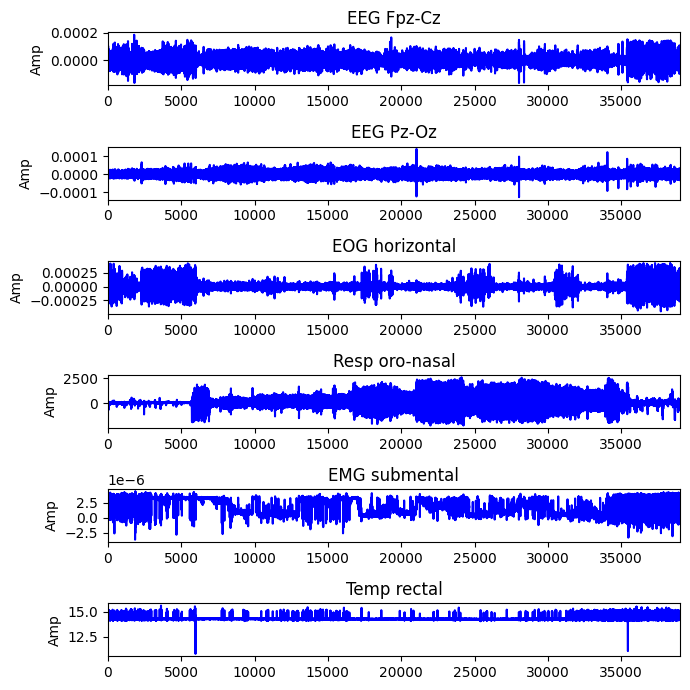

In [10]:
# new eval_b
eval_b_new = np.load(os.path.join(DATA_PATH, 'Eval_new', 'eval_a_NEW_X.npy'))

downsampling_factor = 10  
N, channels, data_length = eval_b_new.shape
# Downsample the data
x = eval_b_new[:, :, ::downsampling_factor]
x = np.hstack(x)

# Time vector for plotting (assuming 100Hz sampling rate and downsampling)
continuous_time_vector = np.linspace(0, N * data_length / 100, x.shape[1])
channel_names = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal']

# Re-plotting with the corrected data structure
fig, axs = plt.subplots(channels, 1, figsize=(7, 7))

for i in range(channels):
    axs[i].plot(continuous_time_vector, x[i, :], color='blue')
    axs[i].set_title(channel_names[i])
    axs[i].set_ylabel('Amp')
    axs[i].set_xlim([continuous_time_vector[0], continuous_time_vector[-1]])

# Plotting labels in the last subplot
# Repeating the labels for each data point (assuming each label applies to the entire epoch)
# repeated_labels = np.repeat(train_label, data_length)[::downsampling_factor]

# axs[-1].plot(continuous_time_vector, repeated_labels, 'o', markersize=2)
# axs[-1].set_title('Labels')
# axs[-1].set_ylabel('Label')
# axs[-1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()